# Exemplo simples do algoritmo Apriori

### Importação das bibliotecas

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

### Exemplo de dados

In [2]:
data = [
    ['leite', 'cereais', 'carne'],
    ['leite', 'pão'],
    ['cereais', 'pão', 'manteiga'],
    ['leite', 'cereais', 'pão'],
    ['leite', 'cereais', 'pão', 'carne'],
    ['leite', 'feijão', 'refrigerante'],
]

### Conversão dos dados para o formato esperado pelo algoritmo

In [3]:
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)


### Aplicação do algoritmo Apriori e busca por regras de associação

In [4]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)


In [5]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(cereais),(leite),0.666667,0.833333,0.5,0.75,0.900,-0.055556,0.666667,-0.250000
1,(leite),(cereais),0.833333,0.666667,0.5,0.60,0.900,-0.055556,0.833333,-0.400000
2,(cereais),(pão),0.666667,0.666667,0.5,0.75,1.125,0.055556,1.333333,0.333333
3,(pão),(cereais),0.666667,0.666667,0.5,0.75,1.125,0.055556,1.333333,0.333333
4,(leite),(pão),0.833333,0.666667,0.5,0.60,0.900,-0.055556,0.833333,-0.400000


### Gráfico de barras para as top regras com maior confiança

In [6]:
def visualize_top_rules(rules, metric='confidence', top_n=10):
    rules = rules.sort_values(by=metric, ascending=False)
    total_rules = len(rules)
    print(f"Foram encontradas {total_rules} regras.")
    
    plt.figure(figsize=(10, 6))
    N = min(total_rules, top_n)
    top_rules = rules.head(N)
    plt.barh(range(N), top_rules[metric], align='center')
    plt.yticks(range(N), [f"Regra {i+1}" for i in range(N)])
    plt.xlabel(f'{metric.capitalize()}')
    plt.title(f'Top {N} Regras por {metric.capitalize()}')
    plt.gca().invert_yaxis()
    plt.show()

### Criação do gráfico de associação

In [7]:
def visualize_association_graph(rules):
    G = nx.DiGraph()

    for idx, row in rules.iterrows():
        antecedent = ', '.join(list(row['antecedents']))
        consequent = ', '.join(list(row['consequents']))

        G.add_node(f"Antecedente: {antecedent}")
        G.add_node(f"Consequente: {consequent}")
        G.add_edge(f"Antecedente: {antecedent}", f"Consequente: {consequent}", weight=row['confidence'])

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_weight='bold', font_size=10)
    edge_labels = {(n1, n2): f"Confiança: {G[n1][n2]['weight']:.2f}" for n1, n2 in G.edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title('Regras de Associação')
    plt.show()

### Cálculo das regras e plotagem dos gráficos

Foram encontradas 6 regras.


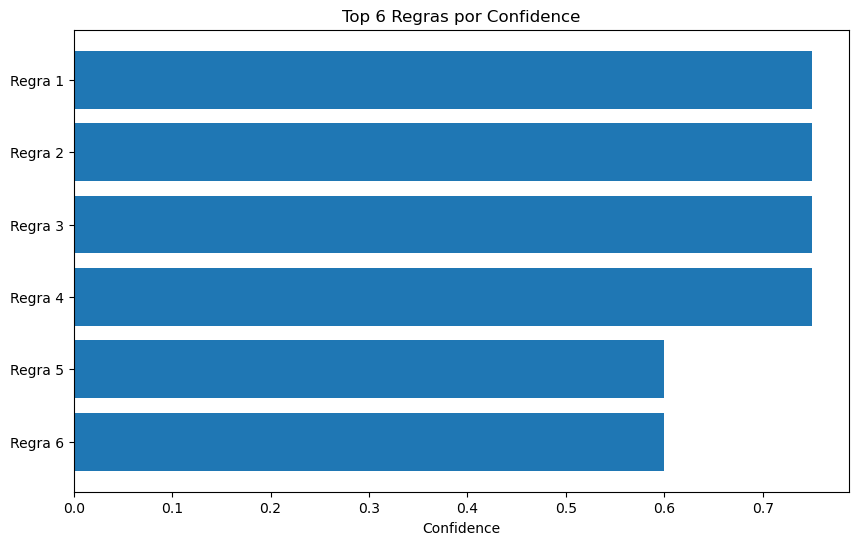

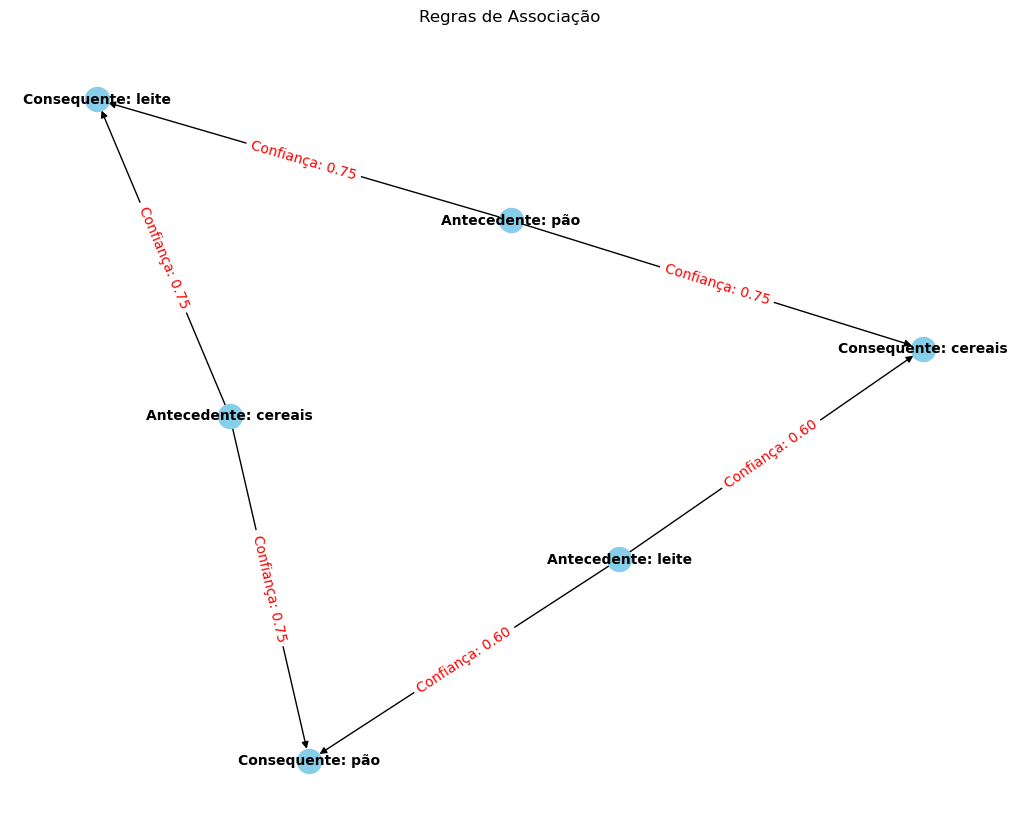

In [8]:
visualize_top_rules(rules, metric='confidence', top_n=10)
visualize_association_graph(rules)